## 1. Importing libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

## 2. Importing training  set 

In [5]:
train=pd.read_csv('C:\\Users\\deepchand\\Desktop\\nci\\DAPA\\Dataset\\train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## 3. Importing test set 

In [6]:
test=pd.read_csv('C:\\Users\\deepchand\\Desktop\\nci\\DAPA\\Dataset\\test_2umaH9m.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


## 4. Preprocessing 

In [8]:
train.shape 

(54808, 14)

In [9]:
test.shape

(23490, 13)

In [10]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

### Data cleaning

In [12]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [14]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [15]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

#### Replacing with Null values with maximum value

In [16]:
train.education.fillna("Bachelor's",inplace=True)
test.education.fillna("Bachelor's",inplace=True)
train.previous_year_rating.fillna(3.0,inplace=True)
test.previous_year_rating.fillna(3.0,inplace=True)

In [17]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

## visualisation

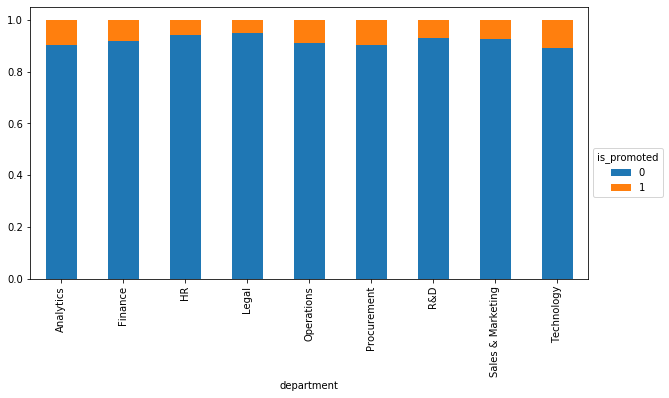

In [74]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train.department,train.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

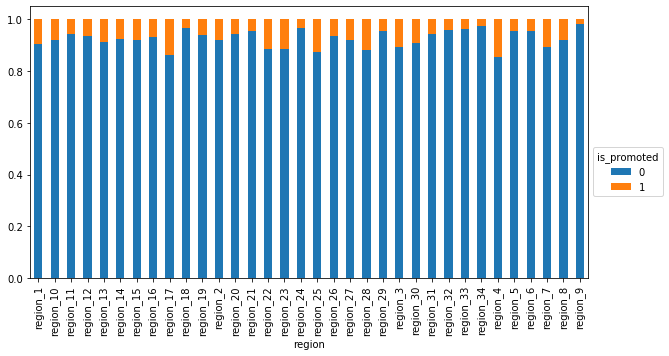

In [75]:
reg = pd.crosstab(train.region,train.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

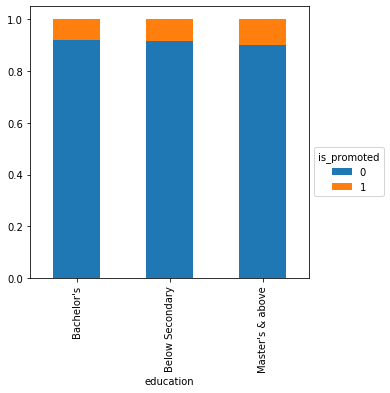

In [76]:
plt.rcParams['figure.figsize'] = [5, 5]
edu = pd.crosstab(train.education,train.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

#### Variation of promotion percentage with respect to gender

In [77]:
pd.crosstab(train.gender,train.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151


#### Variation of promotion percentage with recruitment channel that they have come 

In [78]:
pd.crosstab(train.recruitment_channel,train.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013


#### Variation of promotion percentage with respect to KPIs met or not

In [79]:
pd.crosstab(train['KPIs_met >80%'],train.is_promoted,normalize='index')

is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094


#### Difference in the percentage of promoted employees with respect to previous year ratings

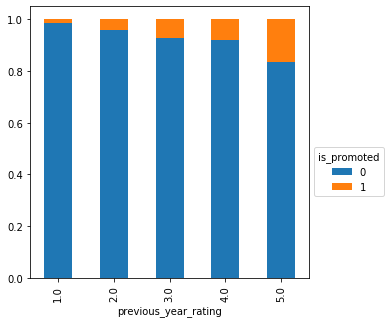

In [80]:
rating = pd.crosstab(train.previous_year_rating,train.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

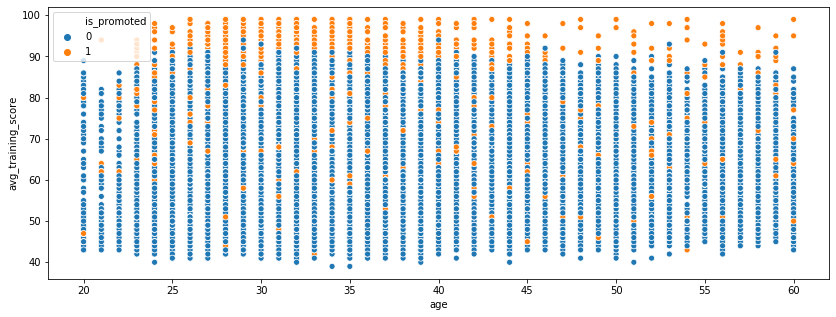

In [82]:
plt.rcParams['figure.figsize'] = [14, 5]
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=train)

### Combining both train and test

In [19]:
train["Source"] = "Train"
test["Source"] = "Test"

In [21]:
full_data = pd.concat([train,test])
full_data.shape

C:\Users\deepchand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(78298, 15)

In [28]:
full_data.head()

,KPIs_met >80%,Source,age,avg_training_score,awards_won?,department,education,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region
0,1,Train,35,49,0,Sales & Marketing,Master's & above,65438,f,0.0,8,1,5.0,sourcing,region_7
1,0,Train,30,60,0,Operations,Bachelor's,65141,m,0.0,4,1,5.0,other,region_22
2,0,Train,34,50,0,Sales & Marketing,Bachelor's,7513,m,0.0,7,1,3.0,sourcing,region_19
3,0,Train,39,50,0,Sales & Marketing,Bachelor's,2542,m,0.0,10,2,1.0,other,region_23
4,0,Train,45,73,0,Technology,Bachelor's,48945,m,0.0,2,1,3.0,other,region_26


### Combine the data which has less observations

In [30]:
full_data['awards_won?'].value_counts()

0    76493
1     1805
Name: awards_won?, dtype: int64

In [31]:
full_data['department'].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [32]:
full_data['education'].value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [33]:
full_data['gender'].value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [34]:
full_data['no_of_trainings'].value_counts()

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
9         7
8         7
10        5
Name: no_of_trainings, dtype: int64

In [36]:
full_data.loc[full_data['no_of_trainings']>=5,'no_of_trainings']='5_10'
full_data['no_of_trainings'].value_counts()

1       63306
2       11531
3        2531
4         658
5_10      272
Name: no_of_trainings, dtype: int64

In [37]:
full_data['previous_year_rating'].value_counts()

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [38]:
full_data['recruitment_channel'].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [39]:
full_data['region'].value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [43]:
map_dict={"region":{'region_1':0,'region_2':0,'region_3':0,'region_4':0,'region_5':0,'region_6':1,'region_7':1,'region_8':1,'region_9':1,'region_10':1,'region_11':2,
                       'region_12':2,'region_13':2,'region_14':2,'region_15':2,'region_16':3,'region_17':3,'region_18':3,'region_19':3,'region_20':3,
                       'region_21':4,'region_22':4,'region_23':4,'region_24':4,'region_25':4,'region_26':5,'region_27':5,'region_28':5,'region_29':5,'region_30':5,
                        'region_31':6,'region_32':6,'region_33':6,'region_34':6}}

In [44]:
full_data=full_data.replace(map_dict)
full_data['region'].head()

0    1
1    4
2    3
3    4
4    5
Name: region, dtype: int64

In [45]:
full_data['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [46]:
full_data['avg_training_score'].value_counts()

50    3943
49    3825
48    3521
51    3370
60    3044
      ... 
98      51
99      48
41      37
40       8
39       3
Name: avg_training_score, Length: 61, dtype: int64

In [47]:
np.percentile(train.loc[:,'age'], [92,93,95,96,97,98,99,100])

array([47., 48., 51., 52., 54., 56., 58., 60.])

In [48]:
np.percentile(train.loc[:,'age'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

array([20., 20., 21., 22., 22., 22., 22., 22.])

In [49]:
np.percentile(train.loc[:,'length_of_service'], [92,93,95,96,97,98,99,100])

array([12., 13., 15., 16., 17., 18., 20., 37.])

In [50]:
np.percentile(train.loc[:,'length_of_service'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
full_data.loc[full_data['length_of_service']>30,'length_of_service']=30
full_data['length_of_service'].value_counts()

3     10066
4      9747
2      9554
5      8424
7      7895
6      6772
1      6539
8      4146
9      3699
10     3134
11     1268
12     1122
13      958
15      833
14      810
16      760
17      636
18      558
19      471
20      190
21      107
23       96
22       88
24       88
25       75
30       73
26       55
27       52
28       42
29       40
Name: length_of_service, dtype: int64

In [52]:
np.percentile(train.loc[:,'avg_training_score'], [92,93,95,96,97,98,99,100])

array([84., 85., 86., 86., 87., 88., 91., 99.])

In [53]:
np.percentile(train.loc[:,'avg_training_score'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

array([42., 43., 43., 43., 44., 44., 44., 44.])

In [55]:
full_set=full_data.copy()

In [56]:
full_set['awards_won?']=full_set['awards_won?'].astype(object)
full_set['is_promoted']=full_set['is_promoted'].astype(object)
full_set['previous_year_rating']=full_set['previous_year_rating'].astype(object)
full_set['KPIs_met >80%']=full_set['KPIs_met >80%'].astype(object)
full_set['region']=full_set['region'].astype(object)

In [57]:
object_val=[x for x in full_set.dtypes.index if full_set.dtypes[x]=='object']
object_val

['KPIs_met >80%',
 'Source',
 'awards_won?',
 'department',
 'education',
 'gender',
 'is_promoted',
 'no_of_trainings',
 'previous_year_rating',
 'recruitment_channel',
 'region']

In [58]:
int_val=[x for x in full_set.dtypes.index if full_set.dtypes[x]!='object']
int_val

['age', 'avg_training_score', 'employee_id', 'length_of_service']

In [59]:
df_dummy = pd.DataFrame(data=full_set, columns=object_val)
df_dummy.drop('Source',axis=1,inplace=True)
df_dummy.columns

Index(['KPIs_met >80%', 'awards_won?', 'department', 'education', 'gender',
       'is_promoted', 'no_of_trainings', 'previous_year_rating',
       'recruitment_channel', 'region'],
      dtype='object')

In [60]:
dummy_coded=pd.get_dummies(df_dummy,drop_first=True,dtype=float) # with K-1
dummy_fullset=pd.concat([full_set,dummy_coded],axis=1)
to_rem=object_val.copy()
to_rem.remove('Source')
dummy_fullset.drop(to_rem,axis=1,inplace=True)
dummy_fullset.columns

Index(['Source', 'age', 'avg_training_score', 'employee_id',
       'length_of_service', 'KPIs_met >80%_1', 'awards_won?_1',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'is_promoted_1.0', 'no_of_trainings_2', 'no_of_trainings_3',
       'no_of_trainings_4', 'no_of_trainings_5_10', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'region_1', 'region_2', 'region_3',
       'region_4', 'region_5', 'region_6'],
      dtype='object')

In [61]:
dummy_fullset.head()

,Source,age,avg_training_score,employee_id,length_of_service,KPIs_met >80%_1,awards_won?_1,department_Finance,department_HR,department_Legal,...,previous_year_rating_4.0,previous_year_rating_5.0,recruitment_channel_referred,recruitment_channel_sourcing,region_1,region_2,region_3,region_4,region_5,region_6
0,Train,35,49,65438,8,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Train,30,60,65141,4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Train,34,50,7513,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Train,39,50,2542,10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Train,45,73,48945,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
dummy_fullset['Age_Awards_Won']=dummy_fullset['age'] * dummy_fullset['awards_won?_1']
dummy_fullset['Age_Awards_Won'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Age_Awards_Won, dtype: float64

In [63]:
dummy_fullset['Age_Awards_Won'].value_counts()

0.0     76493
31.0      140
30.0      119
28.0      117
32.0      114
33.0      113
35.0      109
27.0      108
29.0      107
34.0       93
37.0       78
36.0       77
38.0       75
41.0       58
26.0       56
40.0       51
39.0       46
25.0       42
42.0       29
24.0       28
43.0       24
45.0       22
46.0       20
47.0       18
50.0       15
48.0       15
44.0       14
49.0       14
51.0       14
53.0       12
52.0       10
23.0        9
56.0        9
55.0        7
22.0        7
57.0        7
59.0        6
54.0        6
60.0        6
58.0        4
20.0        3
21.0        3
Name: Age_Awards_Won, dtype: int64

In [72]:
dummy_fullset.shape

(78298, 36)

In [64]:
train_df=dummy_fullset.loc[dummy_fullset['Source']=='Train',:]
del train_df['Source']
test_df=dummy_fullset.loc[dummy_fullset['Source']=='Test',:]
del test_df['Source']

In [65]:
train_df.head()

,age,avg_training_score,employee_id,length_of_service,KPIs_met >80%_1,awards_won?_1,department_Finance,department_HR,department_Legal,department_Operations,...,previous_year_rating_5.0,recruitment_channel_referred,recruitment_channel_sourcing,region_1,region_2,region_3,region_4,region_5,region_6,Age_Awards_Won
0,35,49,65438,8,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,60,65141,4,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,34,50,7513,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,39,50,2542,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,45,73,48945,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
train_x=train_df.drop(['employee_id','region_1','region_2','region_3','region_4','region_5','region_6','is_promoted_1.0'],axis=1).copy()
test_x=test_df.drop(['employee_id','region_1','region_2','region_3','region_4','region_5','region_6','is_promoted_1.0'],axis=1).copy()

In [67]:
train_x.head()

,age,avg_training_score,length_of_service,KPIs_met >80%_1,awards_won?_1,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,recruitment_channel_referred,recruitment_channel_sourcing,Age_Awards_Won
0,35,49,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,30,60,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,34,50,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,39,50,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,73,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [68]:
train_y=train_df['is_promoted_1.0']
test_y=test_df['is_promoted_1.0']

In [83]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_depth':[2,3,4,6,8,10,12,14,16]}]

scorer={'recall_score': make_scorer(recall_score)}

RF = RandomForestClassifier(random_state = 123,n_estimators=300,criterion='entropy',class_weight={0:0.54,1:5.87},max_features='sqrt')
RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
RF_GS.fit(train_x,train_y)  
RF_GS.best_params_

{'max_depth': 8}

In [84]:
RF_GS.best_score_

0.8845330101173003

In [85]:
RF_1 = RandomForestClassifier(random_state = 123,n_estimators=300,criterion='entropy',class_weight={0:0.54,1:5.87},max_depth=8,max_features='sqrt')
RF_1.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.54, 1: 5.87},
                       criterion='entropy', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [86]:
# predict on train set
pred_RF=RF_1.predict(train_x)
metrics.recall_score(train_y,pred_RF)

0.9044558697514996

In [87]:
metrics.f1_score(train_y,pred_RF)

0.3294962344402388

In [88]:
Confusion_Mat_test_RF = confusion_matrix(train_y,pred_RF)
Confusion_Mat_test_RF

array([[33403, 16737],
       [  446,  4222]], dtype=int64)

In [89]:
Var_Importance_RF= pd.Series(data=RF_1.feature_importances_,index=train_x.columns,name='variables')
Var_Importance_RF

age                             0.015498
avg_training_score              0.314348
length_of_service               0.013621
KPIs_met >80%_1                 0.328699
awards_won?_1                   0.048079
department_Finance              0.002365
department_HR                   0.004426
department_Legal                0.001617
department_Operations           0.011005
department_Procurement          0.003773
department_R&D                  0.002048
department_Sales & Marketing    0.034679
department_Technology           0.007939
education_Below Secondary       0.000865
education_Master's & above      0.004149
gender_m                        0.003455
no_of_trainings_2               0.002946
no_of_trainings_3               0.001703
no_of_trainings_4               0.000828
no_of_trainings_5_10            0.000635
previous_year_rating_2.0        0.008431
previous_year_rating_3.0        0.009513
previous_year_rating_4.0        0.009430
previous_year_rating_5.0        0.104891
recruitment_chan

In [90]:
# subset x and y with important predictors
least_importance=Var_Importance_RF[Var_Importance_RF.values < 0.005].index
train_x_1=train_x.drop(least_importance,axis=1).copy()
test_x_1=test_x.drop(least_importance,axis=1).copy()

In [91]:
least_importance

Index(['department_Finance', 'department_HR', 'department_Legal',
       'department_Procurement', 'department_R&D', 'education_Below Secondary',
       'education_Master's & above', 'gender_m', 'no_of_trainings_2',
       'no_of_trainings_3', 'no_of_trainings_4', 'no_of_trainings_5_10',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')